In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plt_overfit import overfit_example, output
from lab_utils_common import sigmoid
np.set_printoptions(precision=8)

In [2]:
def compute_cost_linear_reg(X, y, w, b, lamda=-1):
    m = X.shape[0]
    n = len(w)
    cost = 0
    for i in range(m):
        fwb_i = np.dot(w,X[i]) + b
        cost+=(fwb_i-y[i])**2
    cost /= 2 * m

    reg_cost = 0
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost *= lamda/(2*m)

    total_cost = cost + reg_cost

    return total_cost


In [3]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lamda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(
    X_tmp,y_tmp,w_tmp,b_tmp,lamda_tmp
)
print(f"Regularized Cost : {cost_tmp}")

Regularized Cost : 0.07917239320214277


In [4]:
def compute_cost_logistic_reg(X, y, w, b, lambda_=1):
    m,n = X.shape
    cost = 0
    for i in range(m):
        fwb_i = sigmoid(np.dot(w,X[i])+b)
        cost += -y[i]*np.log(fwb_i) - (1-y[i])*np.log(1-fwb_i)
    cost /= m

    reg_cost = 0
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost *= lambda_ / (2*m)

    total_cost = cost + reg_cost

    return total_cost

In [5]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0, 1, 0, 1, 0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(
    X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp
)
print(f"Regularized Cost = {cost_tmp}")

Regularized Cost = 0.6850849138741673


In [6]:
def compute_gradient_linear_reg(X, y, w, b, lambda_):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        err = (np.dot(w,X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i,j]
        dj_db += err
    dj_dw /= m
    dj_db /= m

    for j in range(n):
        dj_dw[j] += (lambda_/m) * w[j]

    return dj_db, dj_dw

In [7]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0, 1, 0, 1, 0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp = compute_gradient_linear_reg(
    X_tmp,y_tmp,w_tmp,b_tmp,lambda_tmp
)
print(f"dj_db = {dj_db_tmp}")
print(f"dj_dw = {dj_dw_tmp}")

dj_db = 0.6648774569425726
dj_dw = [0.29653215 0.49116796 0.21645878]


In [13]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        fwb_i = sigmoid(np.dot(X[i],w) + b)
        err_i = fwb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i,j]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m

    for j in range(n):
        dj_dw[j] += (lambda_/m) * w[j]

    return dj_db, dj_dw

In [14]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0, 1, 0, 1, 0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic_reg(
    X_tmp,y_tmp,w_tmp,b_tmp,lambda_tmp
)
print(f"dj_db = {dj_db_tmp}")
print(f"dj_dw = {dj_dw_tmp}")

dj_db = 0.341798994972791
dj_dw = [0.17380013 0.32007508 0.10776313]


Output()

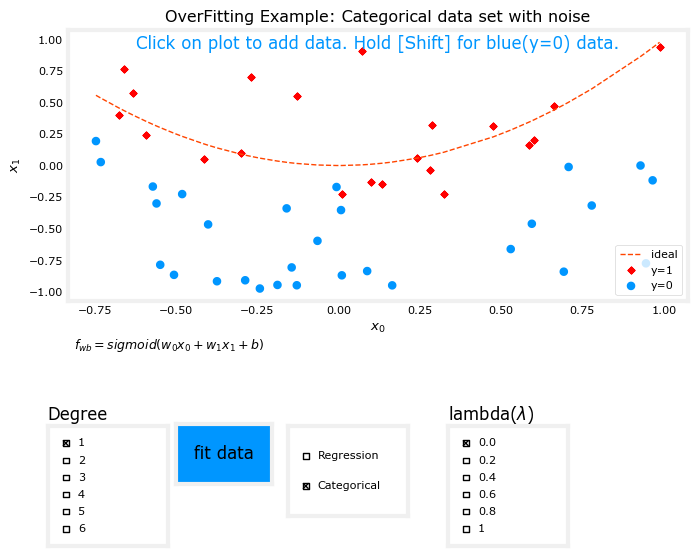

In [15]:
plt.close('all')
display(output)
ofit = overfit_example(True)